# Función carga de datos

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

def cargar_dataframe(ruta, nombre_archivo):
    """
    Carga imágenes y sus etiquetas desde una carpeta y las une en un DataFrame.

    Esta función recorre una carpeta especificada por la ruta y el nombre de archivo para cargar imágenes y sus etiquetas. 
    Luego, crea un DataFrame con las imágenes y etiquetas correspondientes.

    Args:
        ruta (str): La ruta de la carpeta que contiene las imágenes y etiquetas.
        nombre_archivo (str): El nombre de la carpeta que contiene las imágenes y etiquetas.

    Returns:
        pandas.DataFrame: DataFrame que contiene las imágenes y sus etiquetas.
        numpy.ndarray: Array NumPy con las características (imágenes).
        numpy.ndarray: Array NumPy con las etiquetas.

    Raises:
        FileNotFoundError: Si la ruta o el nombre de archivo no son válidos.

    Example:
        ruta = 'C:\\Users\\Usuario\\Downloads'
        nombre_archivo = 'ImagesV2'
        df, X, y = cargar_dataframe(ruta, nombre_archivo)

    """
    # Combinar la ruta y el nombre de archivo para obtener la ruta completa
    ruta_completa = os.path.join(ruta, nombre_archivo)

    # Listas para almacenar las imágenes y etiquetas
    X = []
    y = []

    # Recorrer las subcarpetas de la carpeta principal
    for folder in os.listdir(ruta_completa):
        # Obtener la etiqueta de la subcarpeta
        label = str(folder)

        # Ruta completa de la subcarpeta
        folder_path = os.path.join(ruta_completa, folder)

        # Iterar sobre los archivos dentro de la subcarpeta
        for file in os.listdir(folder_path):
            # Ruta completa de la imagen
            image_path = os.path.join(folder_path, file)

            # Leer la imagen en escala de grises (2D array)
            image = cv2.imread(image_path, 0)
            
            # Aplanar la imagen en un vector 1D
            image = image.flatten()

            # Agregar la imagen y la etiqueta a las listas
            X.append(image)
            y.append(label)

    # Crear un DataFrame con las imágenes y etiquetas
    df = pd.DataFrame({'image': X, 'label': y})

    # Convertir las listas en arrays NumPy
    X = np.array(X)
    y = np.array(y)

    return df, X, y


In [3]:
ruta = r'C:\Users\Usuario\Downloads'
nombre_archivo = 'ImagesV2'

df, X, y = cargar_dataframe(ruta, nombre_archivo)

# Procesamiento de datos

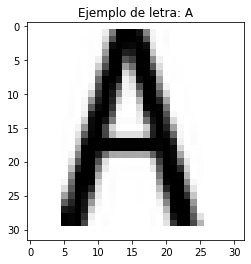

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Reshape de todas las imágenes
# Las imágenes se habían aplanado previamente utilizando image.flatten(). 
# Al aplicar image.reshape((32, 32)), estamos volviendo a darles una forma de 32x32 píxeles
X_reshaped = np.array([image.reshape((32, 32)) for image in X])

# Reshape para ajustar a la forma requerida por train_test_split y el modelo
X_reshaped = X_reshaped.reshape(X_reshaped.shape[0], -1)

# Visualizar una imagen de ejemplo después del reshape
plt.imshow(X_reshaped[0].reshape((32, 32)), cmap='Greys')
plt.title('Ejemplo de letra: {}'.format(y[0]))
plt.show()

# División de los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y, train_size=0.8, test_size=0.2, random_state=42)

# Normalización de los datos
# Escalamos los valores de las características en un rango entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
import os
import numpy as np

# Crear las carpetas
os.makedirs('data_train_processed', exist_ok=True)
os.makedirs('data_test_processed', exist_ok=True)

# Guardar los conjuntos de datos procesados
np.save('data_train_processed/x_train.npy', x_train)
np.save('data_train_processed/y_train.npy', y_train)
np.save('data_test_processed/x_test.npy', x_test)
np.save('data_test_processed/y_test.npy', y_test)


In [4]:
print("Dimensiones de X_reshaped:", X_reshaped.shape)


Dimensiones de X_reshaped: (3224, 1024)


# Target

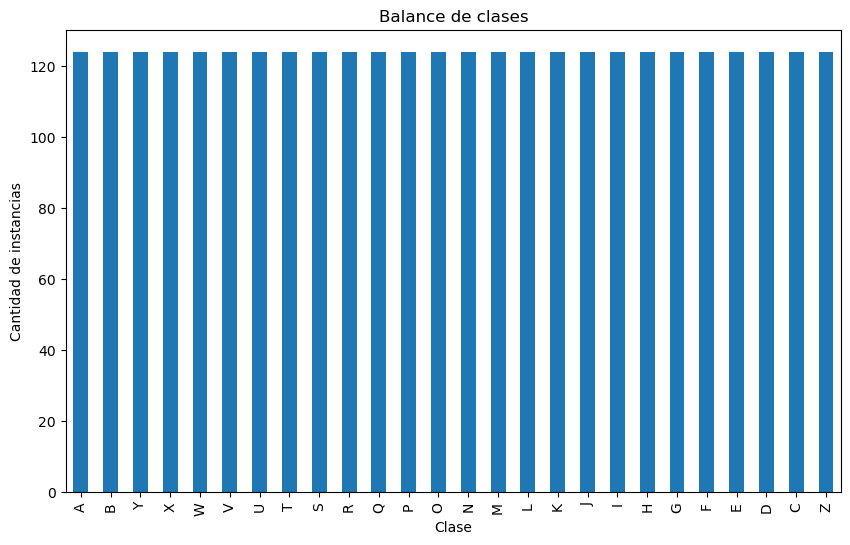

In [108]:
# Comprobamos si el target está balanceado 

import matplotlib.pyplot as plt

class_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Cantidad de instancias')
plt.title('Balance de clases')
plt.show()



# Missing Values

In [6]:
# Comprobación de valores faltantes en el DataFrame
missing_values = df.isnull().sum()

# Mostrar las columnas con valores faltantes
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)



Series([], dtype: int64)


# MODELOS

# Regresión logística

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas Regresión Logística:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))




Métricas Regresión Logística:
Precisión: 0.85
Recall: 0.83
F1-score: 0.84
Accuracy: 0.83


c:\Users\Usuario\bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = DecisionTreeClassifier()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas Decision Tree:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Métricas Decision Tree:
Precisión: 0.61
Recall: 0.60
F1-score: 0.60
Accuracy: 0.60


# SVC

In [157]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = SVC()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas SVC:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Métricas SVC:
Precisión: 0.86
Recall: 0.84
F1-score: 0.85
Accuracy: 0.84


# KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = KNeighborsClassifier()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas KNN:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Métricas KNN:
Precisión: 0.78
Recall: 0.74
F1-score: 0.75
Accuracy: 0.74


c:\Users\Usuario\bootcamp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Ensamble

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = RandomForestClassifier()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas Random Forest:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Métricas Random Forest:
Precisión: 0.83
Recall: 0.81
F1-score: 0.82
Accuracy: 0.81


In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = GradientBoostingClassifier()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas de clasificación:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Métricas de clasificación:
Precisión: 0.80
Recall: 0.78
F1-score: 0.79
Accuracy: 0.78


In [163]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas de clase a valores numéricos enteros ya que 
# XGBoost requiere que las etiquetas de clase sean valores numéricos enteros en lugar de cadenas de texto
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = xgb.XGBClassifier()
model.fit(x_train, y_train_encoded)

y_pred = model.predict(x_test)


precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Métricas XGboost:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))



Métricas XGboost:
Precisión: 0.81
Recall: 0.80
F1-score: 0.80
Accuracy: 0.80


In [164]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = AdaBoostClassifier()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas ADAboost:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Métricas ADAboost:
Precisión: 0.42
Recall: 0.34
F1-score: 0.34
Accuracy: 0.34


# Deep learning

In [165]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print("Métricas MLP:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Métricas MLP:
Precisión: 0.86
Recall: 0.84
F1-score: 0.85
Accuracy: 0.84


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Asegurarse de que los datos de entrada tengan la forma adecuada
# Agregamos una dimensión adicional para representar el canal de color de las imágenes (en este caso, 1 para imágenes en escala de grises).
# -1 se utiliza para que el tamaño de la primera dimensión se ajuste automáticamente según el tamaño original del conjunto de datos
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# Obtener el número de clases
num_classes = len(np.unique(y_train))

# Convertir las etiquetas de clase a números enteros
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Codificar los datos de destino en one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Predecir con el modelo
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular las métricas de clasificación
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Imprimir las métricas de clasificación
print("Métricas de Redes convolucionales:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))







Epoch 1/10
81/81 [==============================] - 2s 20ms/step - loss: 1.7867 - accuracy: 0.5138 - val_loss: 0.9997 - val_accuracy: 0.7302
Epoch 2/10
81/81 [==============================] - 1s 17ms/step - loss: 0.6960 - accuracy: 0.8162 - val_loss: 0.7377 - val_accuracy: 0.8124
Epoch 3/10
81/81 [==============================] - 1s 17ms/step - loss: 0.4861 - accuracy: 0.8682 - val_loss: 0.7725 - val_accuracy: 0.7938
Epoch 4/10
81/81 [==============================] - 2s 19ms/step - loss: 0.3825 - accuracy: 0.8941 - val_loss: 0.6126 - val_accuracy: 0.8372
Epoch 5/10
81/81 [==============================] - 1s 18ms/step - loss: 0.2791 - accuracy: 0.9182 - val_loss: 0.5536 - val_accuracy: 0.8434
Epoch 6/10
81/81 [==============================] - 1s 18ms/step - loss: 0.2186 - accuracy: 0.9314 - val_loss: 0.5749 - val_accuracy: 0.8419
Epoch 7/10
81/81 [==============================] - 2s 20ms/step - loss: 0.1872 - accuracy: 0.9422 - val_loss: 0.5431 - val_accuracy: 0.8589
Epoch 8/10
81

# Resultados

| Modelo              | Precisión | Recall | F1-score | Accuracy |
|---------------------|-----------|--------|----------|----------|
| Regresión Logística | 0.85      | 0.83   | 0.84     | 0.83     |
| Decision Tree       | 0.61      | 0.60   | 0.60     | 0.60     |
| SVC                 | 0.86      | 0.84   | 0.85     | 0.84     |
| KNN                 | 0.78      | 0.74   | 0.75     | 0.74     |
| Random Forest       | 0.83      | 0.81   | 0.82     | 0.81     |
| Gradient Boosting   | 0.80      | 0.78   | 0.79     | 0.78     |
| XGboost             | 0.81      | 0.80   | 0.80     | 0.80     |
| ADAboost            | 0.42      | 0.34   | 0.34     | 0.34     |
| MLP                 | 0.86      | 0.84   | 0.85     | 0.84     |
| Redes convolucionales| 0.88     | 0.87   | 0.87     | 0.87     |


# Mejor modelo

El mejor modelo ha sido el de redes convolucionales que en este caso iene una precisión del 88%, recall del 87%, F1-score del 87% y una exactitud del 87%.

Vamos a explorar si es posible mejorar estas métricas mediante diversas técnicas.

# Drop out

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Asegurarse de que los datos de entrada tengan la forma adecuada
# Agregamos una dimensión adicional para representar el canal de color de las imágenes (en este caso, 1 para imágenes en escala de grises).
# -1 se utiliza para que el tamaño de la primera dimensión se ajuste automáticamente según el tamaño original del conjunto de datos
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# Obtener el número de clases
num_classes = len(np.unique(y_train))

# Convertir las etiquetas de clase a números enteros
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Codificar los datos de destino en one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Capa Dropout para aplicar regularización por Dropout
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Capa Dropout para aplicar regularización por Dropout
model.add(Dense(num_classes, activation='softmax'))


# Se añaden dos capas Dropout desdepués de las capas convolucionales y densas que desactivan un porcentaje d
# de las neuronas en el entrenamiento



# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Predecir con el modelo
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular las métricas de clasificación
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Imprimir las métricas de clasificación
print("Métricas de Redes convolucionales con Dropout:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


Epoch 1/10
81/81 [==============================] - 6s 48ms/step - loss: 2.4668 - accuracy: 0.2900 - val_loss: 1.4147 - val_accuracy: 0.6915
Epoch 2/10
81/81 [==============================] - 3s 40ms/step - loss: 1.5109 - accuracy: 0.5494 - val_loss: 0.8787 - val_accuracy: 0.8031
Epoch 3/10
81/81 [==============================] - 3s 38ms/step - loss: 1.2397 - accuracy: 0.6247 - val_loss: 0.7457 - val_accuracy: 0.8031
Epoch 4/10
81/81 [==============================] - 3s 39ms/step - loss: 1.0137 - accuracy: 0.6995 - val_loss: 0.6385 - val_accuracy: 0.8403
Epoch 5/10
81/81 [==============================] - 3s 42ms/step - loss: 0.8636 - accuracy: 0.7445 - val_loss: 0.5384 - val_accuracy: 0.8636
Epoch 6/10
81/81 [==============================] - 3s 43ms/step - loss: 0.7486 - accuracy: 0.7681 - val_loss: 0.4826 - val_accuracy: 0.8682
Epoch 7/10
81/81 [==============================] - 3s 35ms/step - loss: 0.6888 - accuracy: 0.7852 - val_loss: 0.4761 - val_accuracy: 0.8713
Epoch 8/10
81

Se observa que el modelo ha mejorado en un 1 % en cada una de las métricas al usar Dropout

# BATCH NORMALIZATION

In [8]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Flatten
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Asegurarse de que los datos de entrada tengan la forma adecuada
# Agregamos una dimensión adicional para representar el canal de color de las imágenes (en este caso, 1 para imágenes en escala de grises).
# -1 se utiliza para que el tamaño de la primera dimensión se ajuste automáticamente según el tamaño original del conjunto de datos
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# Obtener el número de clases
num_classes = len(np.unique(y_train))

# Convertir las etiquetas de clase a números enteros
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Codificar los datos de destino en one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Crear el modelo
model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Realizamos un modelo completamente distinto, con capas más sencillas (sin aplicar redes convolucionales) pero añadiendo la capa de BatchNormalization para ver como actua

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

# Predecir con el modelo
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular las métricas de clasificación
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Imprimir las métricas de clasificación
print("Métricas de Redes convolucionales:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

Epoch 1/30
81/81 [==============================] - 2s 6ms/step - loss: 2.9523 - accuracy: 0.1873 - val_loss: 2.8409 - val_accuracy: 0.3318
Epoch 2/30
81/81 [==============================] - 0s 3ms/step - loss: 1.9328 - accuracy: 0.4909 - val_loss: 1.7158 - val_accuracy: 0.6434
Epoch 3/30
81/81 [==============================] - 0s 3ms/step - loss: 1.3878 - accuracy: 0.6258 - val_loss: 1.0659 - val_accuracy: 0.7302
Epoch 4/30
81/81 [==============================] - 0s 3ms/step - loss: 1.0746 - accuracy: 0.7119 - val_loss: 0.8012 - val_accuracy: 0.7876
Epoch 5/30
81/81 [==============================] - 0s 3ms/step - loss: 0.9285 - accuracy: 0.7453 - val_loss: 0.6561 - val_accuracy: 0.8248
Epoch 6/30
81/81 [==============================] - 0s 3ms/step - loss: 0.8135 - accuracy: 0.7716 - val_loss: 0.5981 - val_accuracy: 0.8450
Epoch 7/30
81/81 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.7964 - val_loss: 0.6121 - val_accuracy: 0.8248
Epoch 8/30
81/81 [==

A pesar de ser un modelo computacionalmente más ágil, no mejora los resultados del modelo anterior. Por lo que definitivamente optamos por el uso de redes convolucionales, veamos qué efecto tienen el Batch Normalization en ellas

In [10]:
x_train.shape

(2579, 32, 32, 1)

# Aumentando la complejidad del modelo

In [98]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Asegurarse de que los datos de entrada tengan la forma adecuada
# Agregamos una dimensión adicional para representar el canal de color de las imágenes (en este caso, 1 para imágenes en escala de grises).
# -1 se utiliza para que el tamaño de la primera dimensión se ajuste automáticamente según el tamaño original del conjunto de datos
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# Obtener el número de clases
num_classes = len(np.unique(y_train))

# Convertir las etiquetas de clase a números enteros
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Codificar los datos de destino en one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Capa Dropout para aplicar regularización por Dropout
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Capa Dropout para aplicar regularización por Dropout
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))


y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Imprimir las métricas de clasificación
print("Métricas de Redes convolucionales:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))


# Se intenta aumentar la complejidad del modelo y en este caso se agregan dos capas convolucionales (64 filtros y 128 filtros)
# Para que aumente la capacidad del modelo de detectar mejor aquellas imágenes más difíciles.

Epoch 1/20
81/81 [==============================] - 5s 56ms/step - loss: 1.9440 - accuracy: 0.4444 - val_loss: 0.7170 - val_accuracy: 0.8047
Epoch 2/20
81/81 [==============================] - 4s 54ms/step - loss: 0.7597 - accuracy: 0.7910 - val_loss: 0.4049 - val_accuracy: 0.8822
Epoch 3/20
81/81 [==============================] - 4s 54ms/step - loss: 0.4566 - accuracy: 0.8697 - val_loss: 0.3455 - val_accuracy: 0.9085
Epoch 4/20
81/81 [==============================] - 4s 54ms/step - loss: 0.3553 - accuracy: 0.8930 - val_loss: 0.2786 - val_accuracy: 0.9194
Epoch 5/20
81/81 [==============================] - 4s 54ms/step - loss: 0.2659 - accuracy: 0.9197 - val_loss: 0.2617 - val_accuracy: 0.9132
Epoch 6/20
81/81 [==============================] - 4s 54ms/step - loss: 0.2330 - accuracy: 0.9306 - val_loss: 0.2619 - val_accuracy: 0.9101
Epoch 7/20
81/81 [==============================] - 4s 54ms/step - loss: 0.1975 - accuracy: 0.9415 - val_loss: 0.2410 - val_accuracy: 0.9039
Epoch 8/20
81

Las nuevas métricas muestran una mejora significativa en el rendimiento del primer modelo demostrando que el uso del Dropout, y el aumento de la complejidad del modelo ha sido bastante efectivo en la capacidad para clasificar imágenes.

In [196]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Asegurarse de que los datos de entrada tengan la forma adecuada
# Agregamos una dimensión adicional para representar el canal de color de las imágenes (en este caso, 1 para imágenes en escala de grises).
# -1 se utiliza para que el tamaño de la primera dimensión se ajuste automáticamente según el tamaño original del conjunto de datos
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# Obtener el número de clases
num_classes = len(np.unique(y_train))

# Convertir las etiquetas de clase a números enteros
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Codificar los datos de destino en one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Capa Dropout para aplicar regularización por Dropout
model.add(Dense(num_classes, activation='softmax'))

# Aplicamos Batch Normalization después de aplicar una covolución

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))

# Predecir con el modelo
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular las métricas de clasificación
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Imprimir las métricas de clasificación
print("Métricas de Redes convolucionales:")
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

# Añadimos dos capas de Batch Normalization, después de las capas convolucionales, aumentando así ligeramente la complejidad.

Epoch 1/15
81/81 [==============================] - 6s 68ms/step - loss: 2.0829 - accuracy: 0.4789 - val_loss: 6.8091 - val_accuracy: 0.0992
Epoch 2/15
81/81 [==============================] - 5s 67ms/step - loss: 0.9220 - accuracy: 0.7398 - val_loss: 11.6480 - val_accuracy: 0.0481
Epoch 3/15
81/81 [==============================] - 5s 67ms/step - loss: 0.6851 - accuracy: 0.7976 - val_loss: 11.3526 - val_accuracy: 0.1163
Epoch 4/15
81/81 [==============================] - 5s 66ms/step - loss: 0.4983 - accuracy: 0.8492 - val_loss: 5.5383 - val_accuracy: 0.4140
Epoch 5/15
81/81 [==============================] - 5s 65ms/step - loss: 0.4140 - accuracy: 0.8724 - val_loss: 3.4861 - val_accuracy: 0.5550
Epoch 6/15
81/81 [==============================] - 5s 66ms/step - loss: 0.3921 - accuracy: 0.8782 - val_loss: 0.7029 - val_accuracy: 0.8713
Epoch 7/15
81/81 [==============================] - 5s 66ms/step - loss: 0.3581 - accuracy: 0.8895 - val_loss: 0.3782 - val_accuracy: 0.9101
Epoch 8/15


Conseguimos mejorar un 1% en todas las métricas respecto el modelo anterior. Además vemos que tanto los resultados del train como el test son muy parecidos, por lo que descartamos el overfitting.
Incluso realizando modificaciones sobre estos modelos, no obtienen mejores resultados. Por lo que aceptamos este modelo como el definitvo.

In [198]:
# Guardamos el modelo en formato .h5
model.save('modelo_definitivo.h5')

c:\Users\sergi\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Matriz de confusión

21/21 [==============================] - 0s 13ms/step


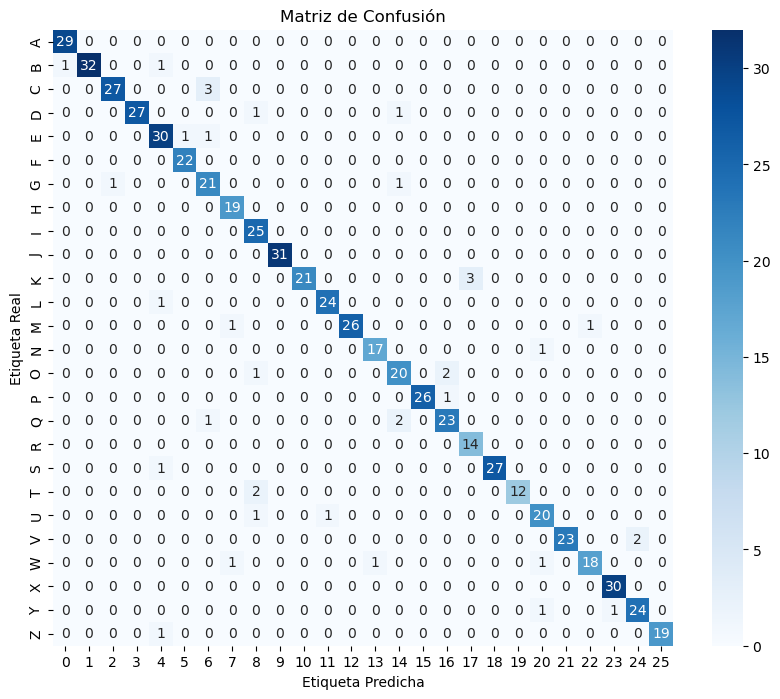

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)


confusion_mat = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', yticklabels=classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

# Que clases se predicen mejor

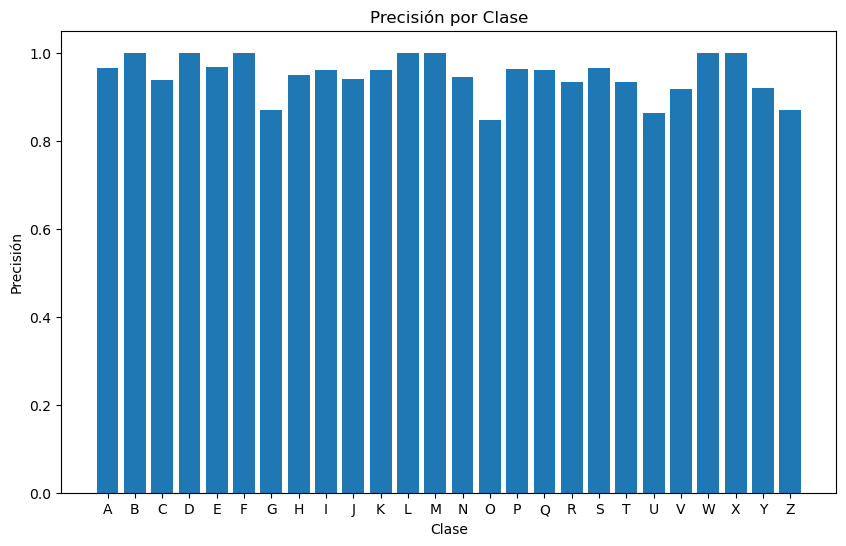

In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)
precision_por_clase = [report[class_name]['precision'] for class_name in classes]


plt.figure(figsize=(10, 6))
plt.bar(classes, precision_por_clase)


plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.title('Precisión por Clase')


plt.show()



# PREDICCIÓN

## PREPROCESADO DE IMÁGENES

In [7]:
import os
import cv2
import pandas as pd


def conversor_imagen_modelo(ruta):
    """
    Preprocesa la imagen antes de poderla predecir, para que se ajuste con las imágenes del modelo entrenado.
    Requisitos de la imagen: Debe verse solamente una letra y el fondo debe ser de un color homogéneo. Además debe exsitir un claro contraste entre el color del fondo y el de la letra.

    Args:
        ruta (str): La ruta donde se ubican la imágenes a procesar

    Returns:
        list : Lista que contiene las imágenes preprocesadas.

    Raises:
        FileNotFoundError: Si la ruta o el nombre de archivo no son válidos.
    """

    # Creamos lista para apendear las imágenes leídas
    lista_imagenes=[]
    
    for file in os.listdir(ruta):
        # Leer la imagen
        imagen = cv2.imread(os.path.join(ruta, file))
        # Apendear la imagen en una lista
        lista_imagenes.append(imagen)

    # Creamos listado de imagenes salientes
    lista_imagenes_proc=[]
    # Aplicamos la transformación a cada una de las imágenes
    for imagen in lista_imagenes:

        ############ BÚSQUEDA DE LETRA #############

        # Convierte la imagen a escala de grises
        grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
        # Si el contorno de la imagen es menor a 150 (píxeles oscuros) entonces los oscuros los hace más oscuros
        if (imagen[:,0].mean()+imagen[:,-1].mean()+imagen[0,:].mean()+imagen[-1,:].mean())/4<150:
            # Aplica un umbral para separar la letra del ruido
            _, umbral = cv2.threshold(grises, 127, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
        # Si el contorno de la imagen es menor a 150 (píxeles oscuros) entonces los oscuros los hace blancos
        else:
            _, umbral = cv2.threshold(grises, 127, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
        # Encuentra los contornos en la imagen umbralizada
        contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Encuentra el contorno más grande
        contorno_letra = max(contornos, key=cv2.contourArea)
        # Encuentra las coordenadas del rectángulo que encierra el contorno
        x, y, w, h = cv2.boundingRect(contorno_letra)
        dim_rectangulo=(x, y, w, h)

        ############## RECORTE CUADRADO #############
        ############ ELIMINACIÓN BORDES #############

        largo=imagen.shape[0]
        ancho=imagen.shape[1]
        # Según el lado más ancho del rectángulo aplicamos unos recortes u otros
        if h>w:
            # Las imágenes usadas en entrenamiento tienen un borde con proporcionalidad 2/28 píxeles, es decir, 2 píxeles por 28 píxeles de tamaña de letra
            # Recortamos la imagen para que se cumpla esa proporcionalidad antes de aplicar el resize
            imagen=imagen[max(y-int(h*(2/28)),4):y+h+int(h*(2/28)), max(x-int(h/2-w/2+h*(2/28)),4):x+int(w/2+h/2+h*(2/28))]
        else:
            imagen=imagen[max(y-int(w*(2/28)),4):y+w+int(w*(2/28)), max(x-int(w/2-h/2+w*(2/28)),4):x+int(h/2+w/2+w*(2/28))]

        ########### COLOR BLANCO Y NEGRO ############

        # Pasamos la imagen a gris paras facilitar el treshold siguiente. Además esto implica pasar de 3 capas a 1
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
        # Aplicamos threshold para que los píxeles por debajo de 127 los ponga en blanco y por arriba en negro
        (thresh, imagen) = cv2.threshold(imagen_gris, 127, 255, cv2.THRESH_BINARY)
        # Si los colores de los pixeles de los extremos (que representan el contorno) son negros, aplicamos transformación
        if (imagen[:,0].mean()+imagen[:,-1].mean()+imagen[0,:].mean()+imagen[-1,:].mean())/4 >= 150:
            # Cambiamos píxeles negros por blancos y viceversa
            imagen = cv2.bitwise_not(imagen)
        else:
            pass

        ################## RESIZE ###################

        # Aplicamos resiez al tamaño de las imágenes del dataset de entrenamiento
        imagen=cv2.resize(imagen, (32,32), interpolation = cv2.INTER_AREA)
        # Apendeamos imagen resultante a la lista
        lista_imagenes_proc.append(imagen)

    return lista_imagenes_proc

## PREDICCIÓN

In [13]:
def predecir(lista, ruta):
    # Cargamos el modelo
    model = load_model('modelo_definitivo.h5')

    # Definimos variables
    i = 1
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    # Recorremos elementos de la lista y mostramos el resultado
    for j, element in enumerate(lista):
        element = element.reshape(-1, 32, 32, 1)
        predictions = model.predict(element)
        probabilities = predictions[0]

        # Obtener el nombre de la imagen actual
        image_name = os.listdir(ruta)[j]

        print(f"Predicción Imagen Nº{i}: - Imagen: {image_name}")
        for letter, probability in zip(classes, probabilities):
            print(f"{letter}: {probability * 100:.2f}%")
        i += 1

In [17]:
ruta=r"C:\Users\Usuario\Downloads\img_a_predecir"

# Llamamos a la función para preprocesar imágenes
lista= conversor_imagen_modelo(ruta)
# Llamamos a la función para predecir la letra
predecir(lista, ruta)

1/1 [==============================] - 0s 355ms/step
Predicción Imagen Nº1: - Imagen: imagen D.jpg
A: 0.00%
B: 0.00%
C: 0.00%
D: 100.00%
E: 0.00%
F: 0.00%
G: 0.00%
H: 0.00%
I: 0.00%
J: 0.00%
K: 0.00%
L: 0.00%
M: 0.00%
N: 0.00%
O: 0.00%
P: 0.00%
Q: 0.00%
R: 0.00%
S: 0.00%
T: 0.00%
U: 0.00%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.00%
1/1 [==============================] - 0s 64ms/step
Predicción Imagen Nº2: - Imagen: imagen E.jpg
A: 0.00%
B: 0.00%
C: 0.00%
D: 0.00%
E: 100.00%
F: 0.00%
G: 0.00%
H: 0.00%
I: 0.00%
J: 0.00%
K: 0.00%
L: 0.00%
M: 0.00%
N: 0.00%
O: 0.00%
P: 0.00%
Q: 0.00%
R: 0.00%
S: 0.00%
T: 0.00%
U: 0.00%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.00%
1/1 [==============================] - 0s 64ms/step
Predicción Imagen Nº3: - Imagen: imagen M.jpg
A: 0.00%
B: 0.00%
C: 0.00%
D: 0.00%
E: 0.00%
F: 0.00%
G: 0.00%
H: 0.00%
I: 0.00%
J: 0.00%
K: 0.00%
L: 0.00%
M: 100.00%
N: 0.00%
O: 0.00%
P: 0.00%
Q: 0.00%
R: 0.00%
S: 0.00%
T: 0.00%
U: 0.00%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.0